In [21]:
!pip3 install import_ipynb

In [22]:
import import_ipynb
import numpy as np
import pandas as pd
import dataScience as ds

In [23]:
def normalize(V,maxV,minV):
    if V==0:
        return V
    normalized_V = (V - minV) / (maxV - minV)
    
    return normalized_V

In [24]:
def createClusteredData(X:list,Y:list):
    newArr = []
    for index,value in enumerate(X):
        newArr.append([normalize(X[index],np.max(X),np.min(X)),normalize(Y[index],np.max(Y),np.min(Y))])
    return newArr



## Using K Means Clustering Algorithm



In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
def KnnMeans(clusterVal):
    dataForClustering = np.array(createClusteredData(sorted(ds.expectedPayment), sorted(ds.paymentDoneByChampion)))


    model = KMeans(n_clusters=clusterVal)

    model = model.fit(dataForClustering)

    plt.figure(figsize=(8, 6))
    fig, ax = plt.subplots()

    ax.scatter(dataForClustering[:,0], dataForClustering[:,1], c=model.labels_.astype(float),alpha=0.9)
    return fig, ax



## Real World Clustering on Active Project

Here this is an example of Clustering of Data in a real life scenario where Datas are clustered Together to give the Kmeans value . This is the scattered plot for Payment Done by the Champion verses Payment to be done on a daily basis

In [26]:
!pip install flask-ngrok
!pip install flask --upgrade

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8000
 * Running on http://192.168.1.3:8000
Press CTRL+C to quit
/Users/debanilguha/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
127.0.0.1 - - [09/Jan/2024 16:30:28] "GET /det?count=3 HTTP/1.1" 200 -
/Users/debanilguha/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
127.0.0.1 - - [09/Jan/2024 16:31:25] "GET /det?count=3 HTTP/1.1" 200 -
/Users/debanilguha/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to s

<Figure size 800x600 with 0 Axes>

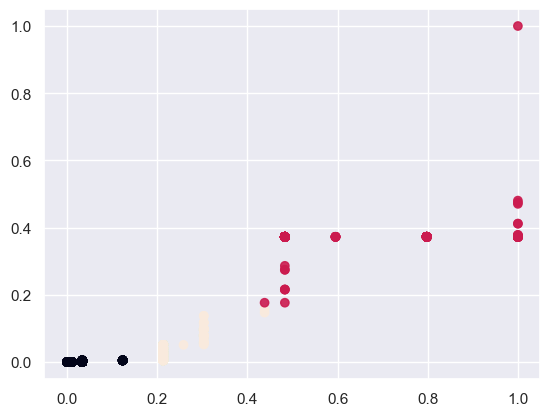

<Figure size 800x600 with 0 Axes>

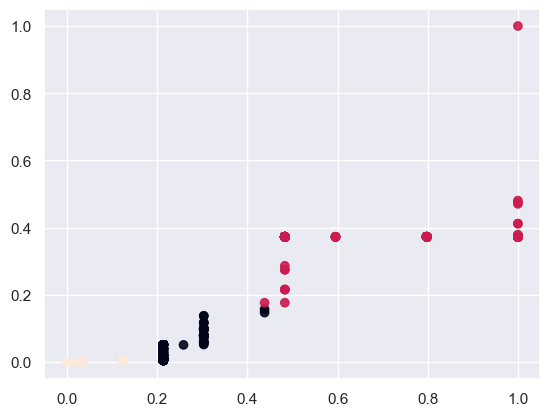

<Figure size 800x600 with 0 Axes>

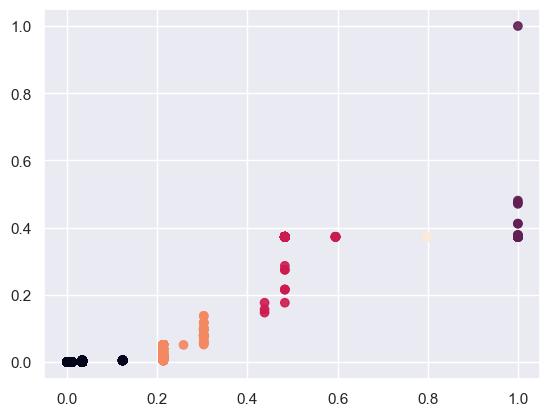

<Figure size 800x600 with 0 Axes>

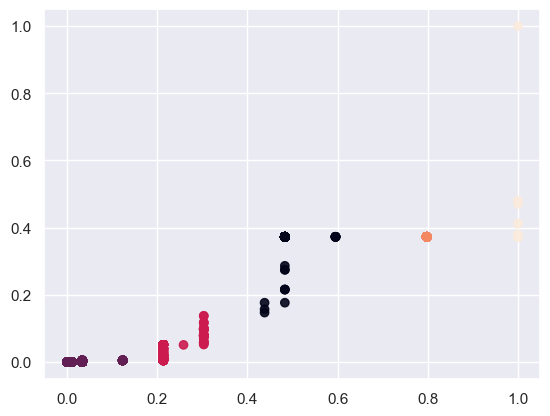

In [29]:
from flask import Flask
from flask import request,Response
import mpld3

app = Flask(__name__)
# run_with_ngrok(app)
@app.route("/det",methods=['GET'])
def index():
  count = int(request.args.get('count'))
  fig, ax = KnnMeans(count)
  html = mpld3.fig_to_html(fig)
  # print(html)
  return Response(html,status=200)
app.run(host="0.0.0.0",port=8000)